In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings

In [2]:
df_opponent = pd.read_excel("C://Users//Prave//Downloads//basketball_LTuw.xlsx",sheet_name="GamebyGame_Oppents")

In [3]:
df_ltu = pd.read_excel("C://Users//Prave//Downloads//basketball_LTuw.xlsx",sheet_name="Overall_GameByGameTeamstats")

In [4]:
df_players = pd.read_excel("C://Users//Prave//Downloads//basketball_LTuw.xlsx",sheet_name="Overall Individual 2019-24")

In [5]:
#df_players.head()

In [6]:
# Suppress all warnings
warnings.filterwarnings("ignore")

In [7]:
pd.set_option('display.max_columns', None)  # Show all columns
# Show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)  # Set the display width

# Summary of players stats from last season

In [8]:
summary_df = df_players.describe().transpose()
print(tabulate(summary_df, headers='keys', tablefmt='grid'))


+---------------+---------+------------+------------+-------+---------+---------+----------+----------+
|               |   count |       mean |        std |   min |     25% |     50% |      75% |      max |
+===============+=========+============+============+=======+=========+=========+==========+==========+
| Jersey Number |      35 |  16.6571   |  11.7747   |     0 |  7.5    |  14     |  24.5    |   44     |
+---------------+---------+------------+------------+-------+---------+---------+----------+----------+
| GP            |      35 |  17.8571   |  10.7022   |     1 |  6      |  19     |  29      |   29     |
+---------------+---------+------------+------------+-------+---------+---------+----------+----------+
| GS            |      35 |   8.28571  |  11.3256   |     0 |  0      |   1     |  14.5    |   29     |
+---------------+---------+------------+------------+-------+---------+---------+----------+----------+
| Minutes-TOT   |      35 | 335.257    | 327.788    |     3 | 26

In [9]:
df_players_2324 = pd.read_excel("C://Users//Prave//Downloads//basketball_LTuw.xlsx",sheet_name="Individual_overal_matchwise")

In [10]:
#df_players_2324.head()

In [11]:
df = pd.DataFrame(df_players_2324)

# Define custom aggregation functions
def aggregate_stats(df):
    return pd.DataFrame({
        'mean': df.mean(),
        'std': df.std(),
        'min': df.min(),
        'max': df.max(),
        '25%': df.quantile(0.25),
        '50%': df.quantile(0.50),
        '75%': df.quantile(0.75)
    })

In [12]:
# Calculate player-specific summary statistics
player_summary_5 = df_players.groupby(['Player-']).apply(aggregate_stats).reset_index()

In [13]:
player_summary_5['Player-'] = player_summary_5['Player-'].apply(lambda x: ' '.join([x.split()[0], x.split()[-1]]) if len(x.split()) > 1 else x)

In [14]:
#player_summary_5.head()

In [15]:
player_summary_5 =  player_summary_5[['Player-', 'level_1', 'mean']]

In [16]:
player_summary_5.rename(columns={'Player-': 'Player Name'}, inplace=True)
#player_summary_5

In [17]:
player_summary = df.groupby(['Player Name']).apply(aggregate_stats).reset_index()

In [18]:
#player_summary

In [19]:
player_summary =  player_summary[['Player Name', 'level_1', 'std','min','max','25%','50%','75%']]

In [20]:
#player_summary

In [21]:
player_summary_updated = player_summary_5.merge(
    player_summary,
    left_on=['Player Name', 'level_1'],  # Add any additional keys from player_summary
    right_on=['Player Name', 'level_1'],     # Corresponding additional keys from player_summary_5
    how='left'                               # Type of join (left join)
)

In [22]:
#player_summary_updated

In [23]:
player_summary_updated.to_excel('C://Users//Prave//Downloads//layer_summary.xlsx', index=False)

In [24]:
#df.head()

# Shooting Efficiency from last season

In [25]:
# Assuming df is your DataFrame
shooting_efficiency = df_players[['FG%', '3PT%', 'FT%']].describe()
print(tabulate(shooting_efficiency, headers='keys', tablefmt='grid'))


+-------+-----------+-----------+-----------+
|       |       FG% |      3PT% |       FT% |
+=======+===========+===========+===========+
| count | 35        | 35        | 35        |
+-------+-----------+-----------+-----------+
| mean  |  0.3058   |  0.161429 |  0.578429 |
+-------+-----------+-----------+-----------+
| std   |  0.149039 |  0.151448 |  0.33005  |
+-------+-----------+-----------+-----------+
| min   |  0        |  0        |  0        |
+-------+-----------+-----------+-----------+
| 25%   |  0.2335   |  0        |  0.44     |
+-------+-----------+-----------+-----------+
| 50%   |  0.332    |  0.167    |  0.714    |
+-------+-----------+-----------+-----------+
| 75%   |  0.4135   |  0.2995   |  0.794    |
+-------+-----------+-----------+-----------+
| max   |  0.526    |  0.417    |  1        |
+-------+-----------+-----------+-----------+


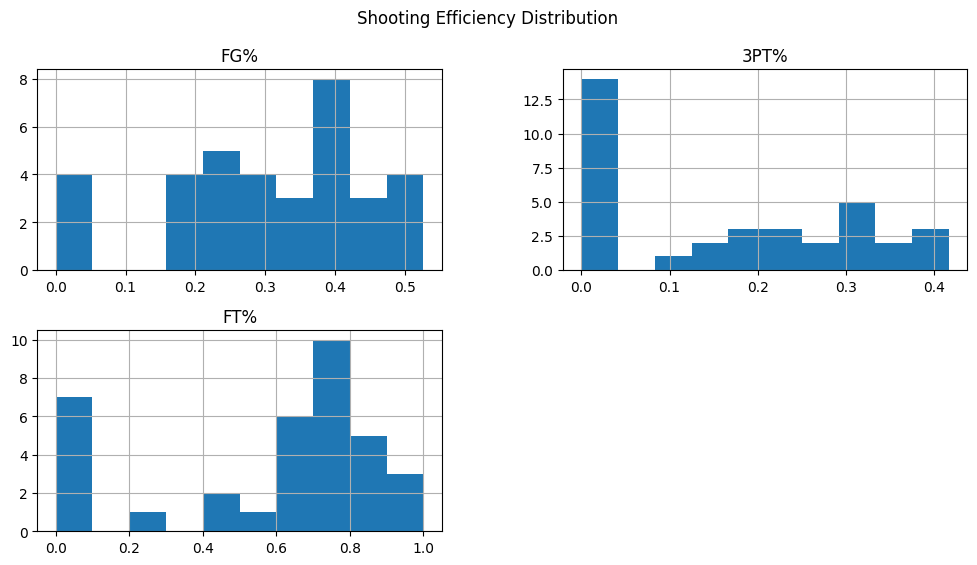

In [26]:
import matplotlib.pyplot as plt

df_players[['FG%', '3PT%', 'FT%']].hist(bins=10, figsize=(12, 6))
plt.suptitle('Shooting Efficiency Distribution')
plt.show()


In [27]:
#Rank players by FG%, 3PT%, and FT% to identify top shooters.

top_shooters = df_players[['Player-', 'FG%', '3PT%', 'FT%']].sort_values(by='FG%', ascending=False)
#print(top_shooters.head(10))
print(tabulate(top_shooters.head(10), headers='keys', tablefmt='grid'))


+----+---------------------------------------------------------+-------+--------+-------+
|    | Player-                                                 |   FG% |   3PT% |   FT% |
+====+=========================================================+=======+========+=======+
|  8 | Gough, Gabby                                            | 0.526 |  0.125 | 0.697 |
|    |                                     32 Gough, Gabby     |       |        |       |
+----+---------------------------------------------------------+-------+--------+-------+
|  5 | Jacobs, Kate                                            | 0.515 |  0     | 0.647 |
|    |                                     20 Jacobs, Kate     |       |        |       |
+----+---------------------------------------------------------+-------+--------+-------+
|  6 | Evans, Dominique                                        | 0.511 |  0     | 0.714 |
|    |                                     10 Evans, Dominique |       |        |       |
+----+----

# Scoring Efficiency from last season

In [28]:
df_players['PTS_per_FGA'] = df_players['PTS'] / df['FGA']
scoring_efficiency = df_players[['PTS', 'FGM', 'FGA', 'PTS_per_FGA']].describe()
#print(scoring_efficiency)
print(tabulate(scoring_efficiency, headers='keys', tablefmt='grid'))


+-------+---------+----------+---------+---------------+
|       |     PTS |      FGM |     FGA |   PTS_per_FGA |
+=======+=========+==========+=========+===============+
| count |  35     |  35      |  35     |      35       |
+-------+---------+----------+---------+---------------+
| mean  | 101.629 |  36.0571 |  94.2   |      11.6843  |
+-------+---------+----------+---------+---------------+
| std   | 118.36  |  42.4576 | 105.029 |      16.4105  |
+-------+---------+----------+---------+---------------+
| min   |   0     |   0      |   0     |       0       |
+-------+---------+----------+---------+---------------+
| 25%   |   7.5   |   2      |   9.5   |       1.58333 |
+-------+---------+----------+---------+---------------+
| 50%   |  42     |  13      |  36     |       5.2     |
+-------+---------+----------+---------+---------------+
| 75%   | 170     |  60      | 184     |      17.8542  |
+-------+---------+----------+---------+---------------+
| max   | 475     | 163      | 

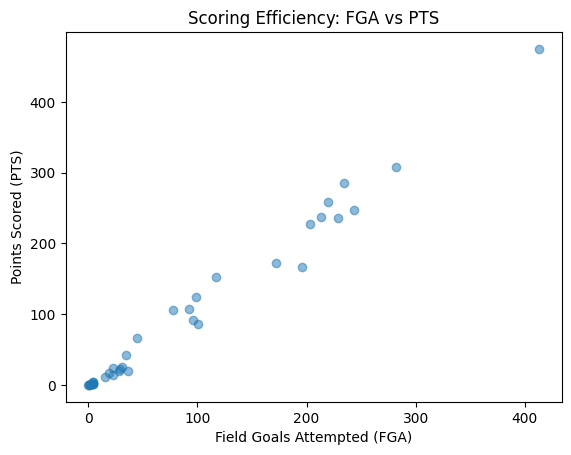

In [29]:
plt.scatter(df_players['FGA'], df_players['PTS'], alpha=0.5)
plt.xlabel('Field Goals Attempted (FGA)')
plt.ylabel('Points Scored (PTS)')
plt.title('Scoring Efficiency: FGA vs PTS')
plt.show()


In [30]:
top_scorers = df_players[['Player-', 'PTS', 'FGM', 'FGA', 'PTS_per_FGA']].sort_values(by='PTS_per_FGA', ascending=False)
#top_scorers.head(10)
print(tabulate(top_scorers.head(10), headers='keys', tablefmt='grid'))

+----+---------------------------------------------------------+-------+-------+-------+---------------+
|    | Player-                                                 |   PTS |   FGM |   FGA |   PTS_per_FGA |
+====+=========================================================+=======+=======+=======+===============+
|  0 | Fisher, Kendall                                         |   475 |   163 |   413 |       79.1667 |
|    |                                     3 Fisher, Kendall   |       |       |       |               |
+----+---------------------------------------------------------+-------+-------+-------+---------------+
| 18 | Faris, Jade                                             |   308 |   119 |   282 |       51.3333 |
|    |                                     33 Faris, Jade      |       |       |       |               |
+----+---------------------------------------------------------+-------+-------+-------+---------------+
|  1 | Long, Maggie                                    

# Rebounding Capability from last season

In [31]:
#Goal: Analyze how well players rebound the ball both offensively and defensively.

rebounding_metrics = df_players[['Rebounds TOT', 'Rebounds OFF', 'DEF']].describe()

print(tabulate(rebounding_metrics, headers='keys', tablefmt='grid'))

+-------+----------------+----------------+----------+
|       |   Rebounds TOT |   Rebounds OFF |      DEF |
+=======+================+================+==========+
| count |        35      |        35      |  35      |
+-------+----------------+----------------+----------+
| mean  |        56.0571 |        13.6857 |  42.3714 |
+-------+----------------+----------------+----------+
| std   |        63.8656 |        17.5495 |  47.9185 |
+-------+----------------+----------------+----------+
| min   |         0      |         0      |   0      |
+-------+----------------+----------------+----------+
| 25%   |         6.5    |         2      |   4      |
+-------+----------------+----------------+----------+
| 50%   |        27      |         5      |  22      |
+-------+----------------+----------------+----------+
| 75%   |        84      |        18.5    |  63      |
+-------+----------------+----------------+----------+
| max   |       237      |        66      | 173      |
+-------+-

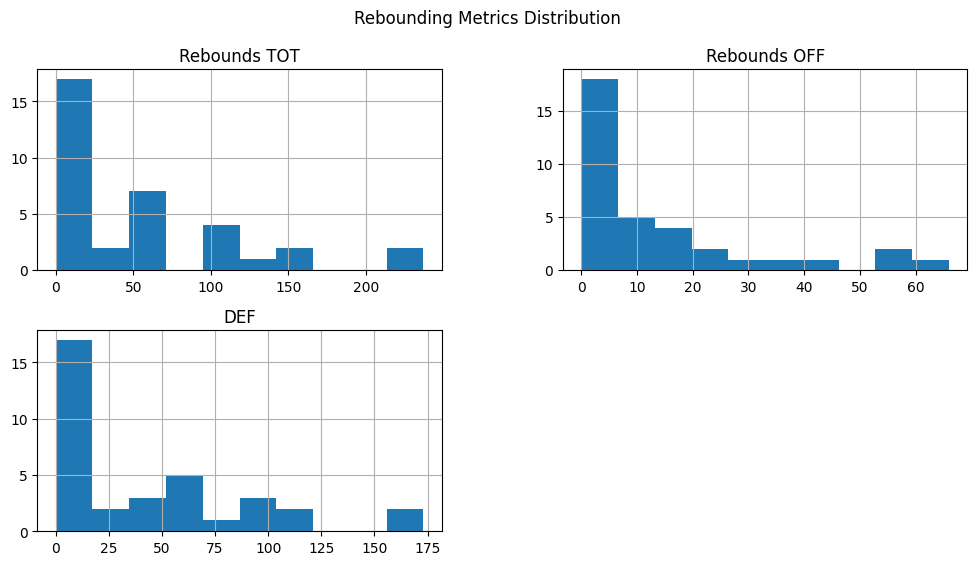

In [32]:
df_players[['Rebounds TOT', 'Rebounds OFF', 'DEF']].hist(bins=10, figsize=(12, 6))
plt.suptitle('Rebounding Metrics Distribution')
plt.show()


In [33]:
top_rebounders = df_players[['Player-', 'Rebounds TOT', 'Rebounds OFF', 'DEF']].sort_values(by='Rebounds TOT', ascending=False)

print(tabulate(top_rebounders.head(10), headers='keys', tablefmt='grid'))

+----+---------------------------------------------------------+----------------+----------------+-------+
|    | Player-                                                 |   Rebounds TOT |   Rebounds OFF |   DEF |
+====+=========================================================+================+================+=======+
| 18 | Faris, Jade                                             |            237 |             66 |   171 |
|    |                                     33 Faris, Jade      |                |                |       |
+----+---------------------------------------------------------+----------------+----------------+-------+
| 19 | Jacobs, Kate                                            |            226 |             53 |   173 |
|    |                                     20 Jacobs, Kate     |                |                |       |
+----+---------------------------------------------------------+----------------+----------------+-------+
|  0 | Fisher, Kendall               

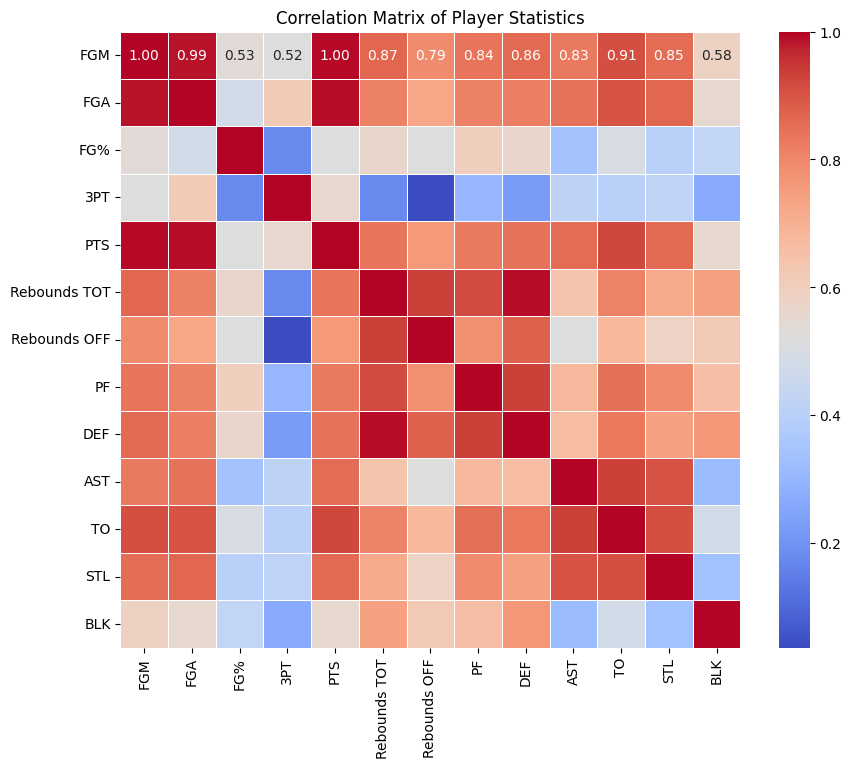

In [34]:
# Compute correlation matrix of last season
correlation_matrix = df_players[['FGM', 'FGA', 'FG%', '3PT', 'PTS', 'Rebounds TOT', 'Rebounds OFF','PF', 'DEF','AST', 'TO', 'STL', 'BLK']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Player Statistics')
plt.show()

Positive Correlation: A high positive correlation (close to +1) indicates that as one feature increases, the other feature tends to increase as well.

Negative Correlation: A high negative correlation (close to -1) indicates that as one feature increases, the other feature tends to decrease.

No Correlation: A correlation close to 0 indicates little to no linear relationship between the features.

# Feature Importance based on 5 years data

In [35]:
df_players_5 = pd.read_excel("C://Users//Prave//Downloads//basketball_LTuw.xlsx",sheet_name="Overall Individual Statistics 2")

In [148]:
#df_players_5.head()

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [38]:
data = df_players_5

In [39]:
# Select features and target variable (example: predicting Points Scored 'PTS')
features = data[['GP', 'GS', 'Minutes-TOT', 'Minutes-AVG', 'FGA', 'FG%', '3PT', 'Rebounds OFF', 'DEF','PF','AST','TO','STL','BLK']]
target = data['FGM']  # Replace with your target variable

In [40]:
# Handle any missing values if necessary
features.fillna(0, inplace=True)  # Example: filling missing values with 0

In [41]:
# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [42]:
# Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Step 4: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [44]:
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 67.82813625665615
R² Score: 0.9743138375790671


In [45]:
# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [46]:
# Get cross-validated predictions
predictions = cross_val_predict(model, features, target, cv=kf)

In [47]:
# Calculate MSE and R² score for each fold
mse_scores = []
r2_scores = []

In [48]:
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    print(f'Fold MSE: {mse}, R² Score: {r2}')

Fold MSE: 67.82813625665567, R² Score: 0.9743138375790672
Fold MSE: 26.81528969512752, R² Score: 0.9879362562105779
Fold MSE: 55.38760272218014, R² Score: 0.9773864977925978
Fold MSE: 46.570456080722025, R² Score: 0.9448193995065711
Fold MSE: 16.658134503903195, R² Score: 0.9932634553421716


In [49]:
# Print average MSE and R² score across all folds
print(f'\nMean Cross-Validated Mean Squared Error: {np.mean(mse_scores)}')
print(f'Mean Cross-Validated R² Score: {np.mean(r2_scores)}')


Mean Cross-Validated Mean Squared Error: 42.65192385171771
Mean Cross-Validated R² Score: 0.9755438892861971


In [50]:
df_players_5 = pd.read_excel("C://Users//Prave//Downloads//basketball_LTuw.xlsx",sheet_name="Overall Individual Statistics 2")

In [51]:
#df_players_5

In [52]:
print(df_players_5['Year'].unique())

['2019-20' '2020-21' '2021-22' '2022-23' '2023-24']


In [149]:
#df_players_5.head()

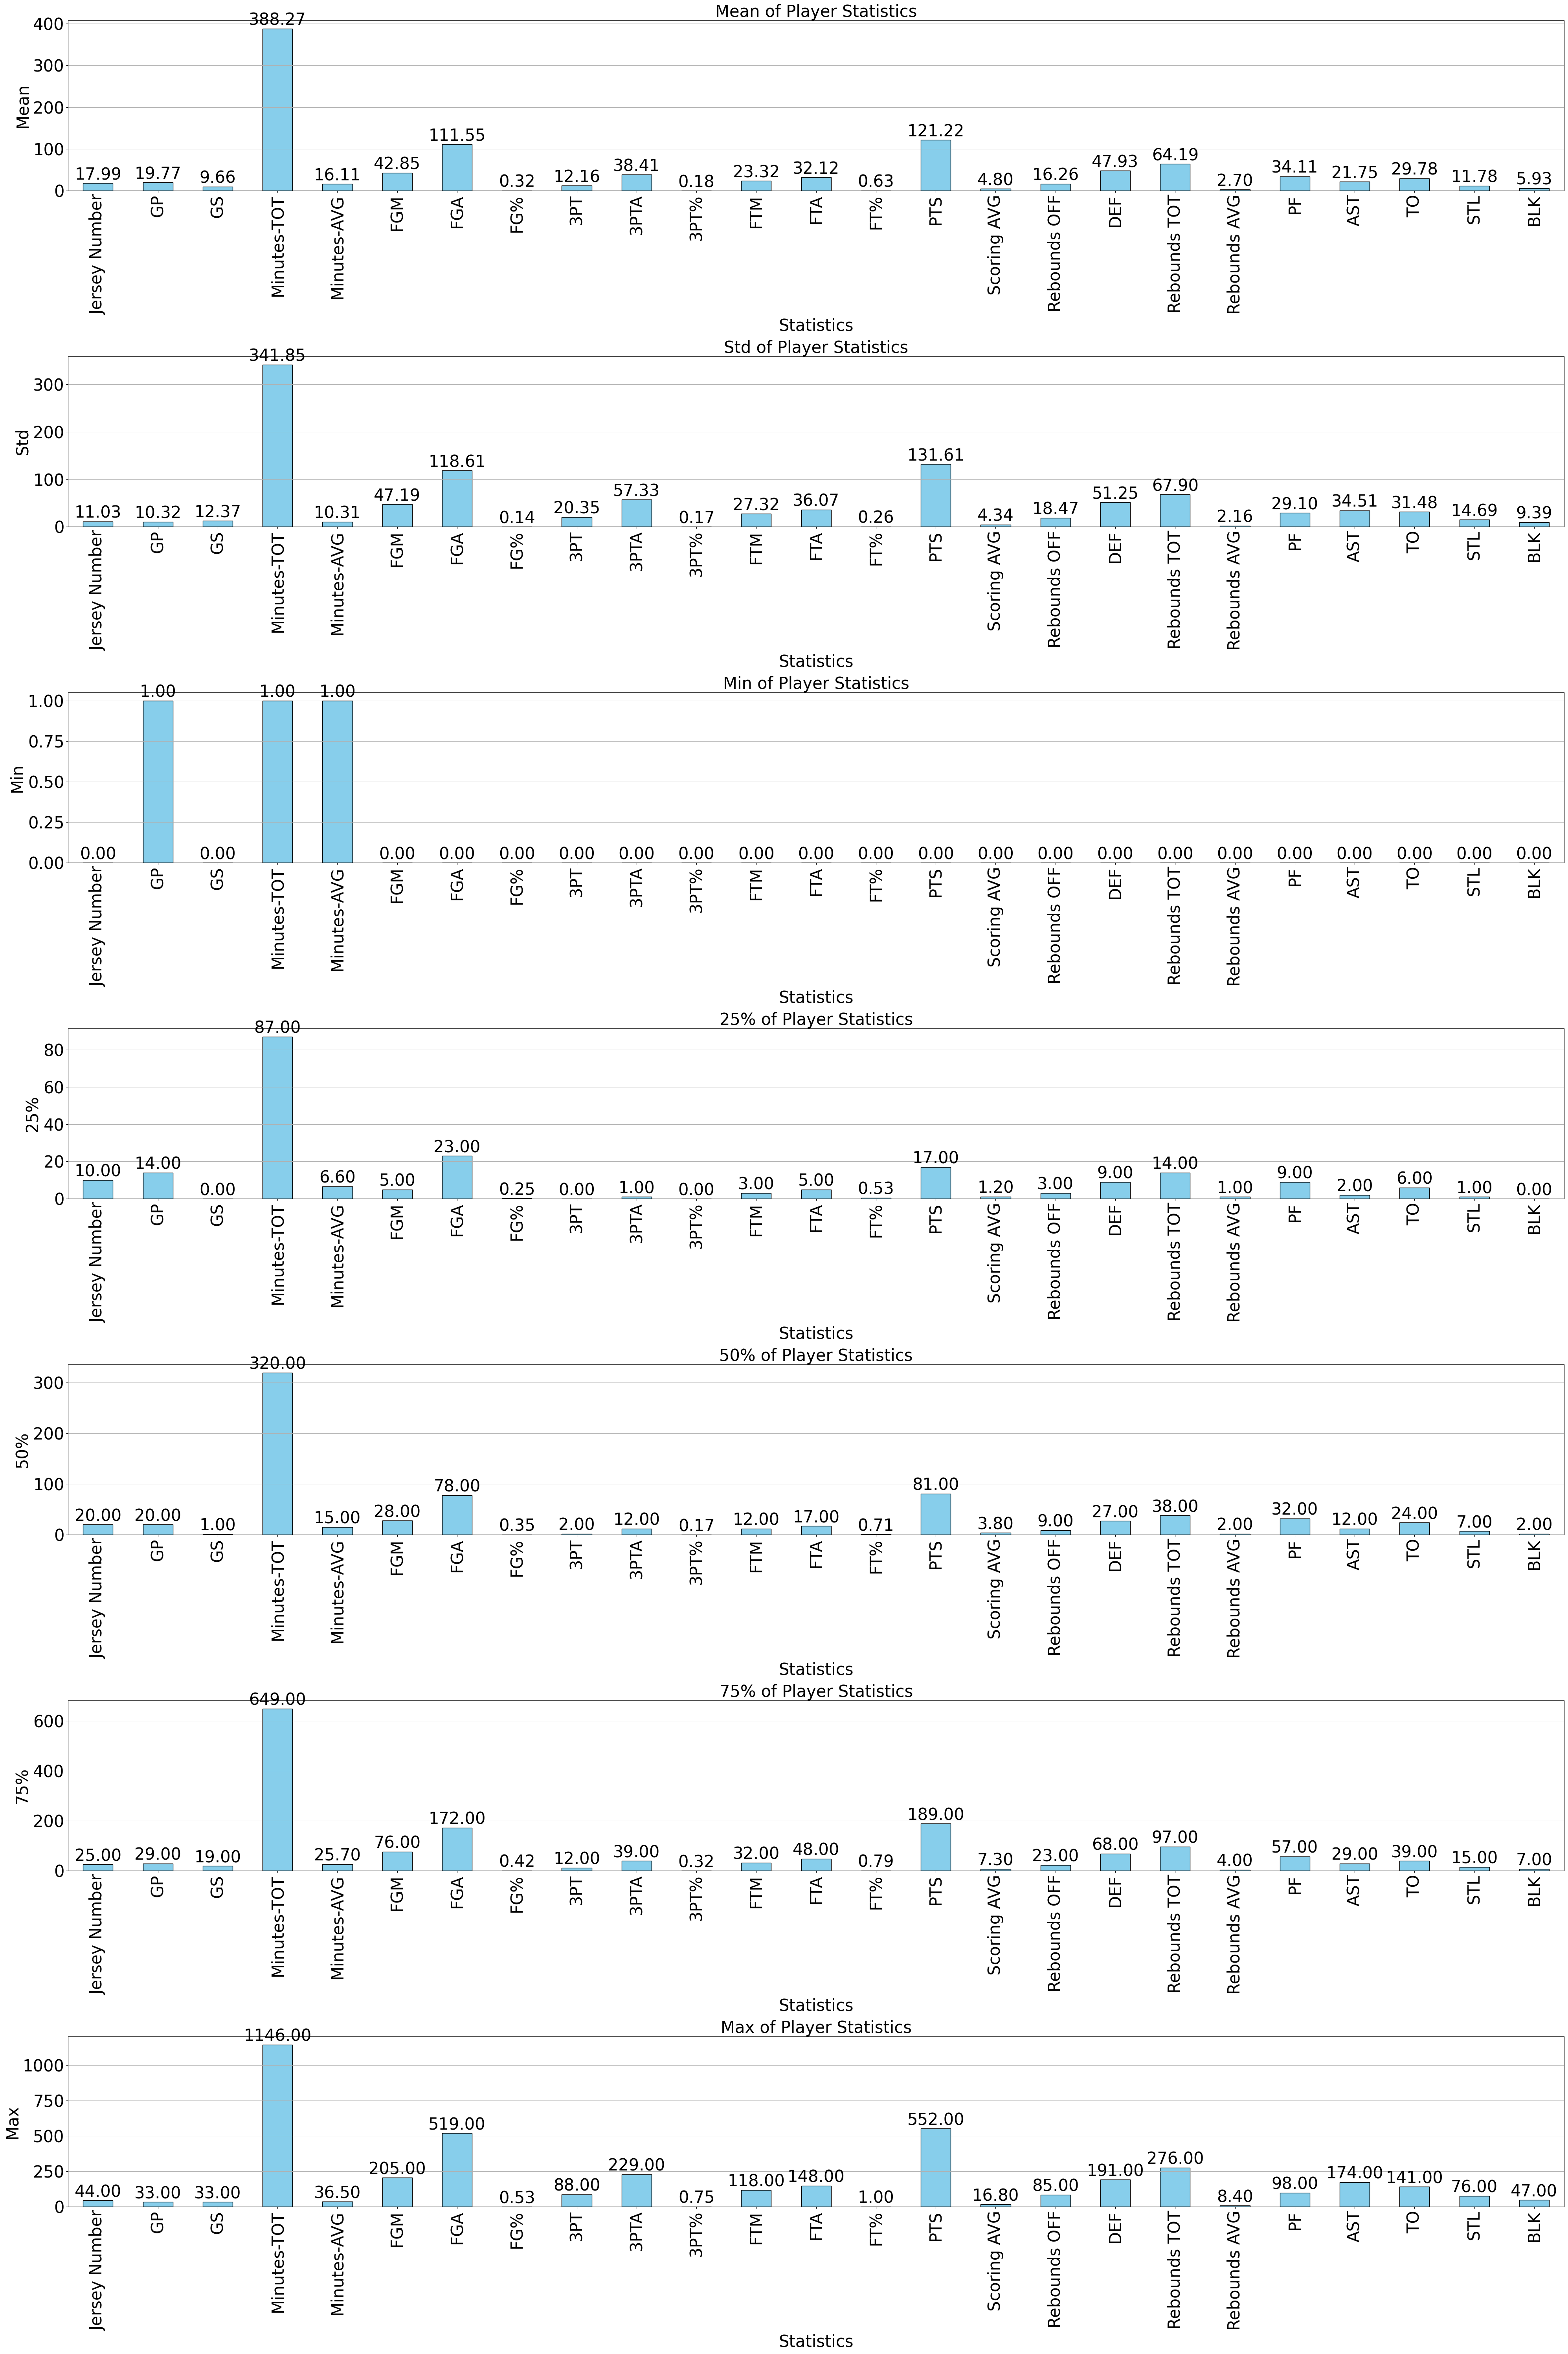

In [54]:
df_players_5 = pd.DataFrame(data)

# Calculate descriptive statistics
df_players_5.describe()

# Create small multiples for descriptive stats
metrics_to_plot = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
fig, axes = plt.subplots(nrows=len(metrics_to_plot), ncols=1, figsize=(40, 60))

for ax, metric in zip(axes, metrics_to_plot):
    bars = df_players_5.describe().loc[metric].plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'{metric.capitalize()} of Player Statistics', fontsize=30)
    ax.set_ylabel(metric.capitalize(), fontsize=30)
    ax.set_xlabel('Statistics', fontsize=30)
    ax.tick_params(axis='both', labelsize=30)  # Increase tick label size
    ax.grid(axis='y')
    
    # Add data labels
    for bar in bars.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    (bar.get_x() + bar.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=30)

plt.tight_layout()
plt.show()

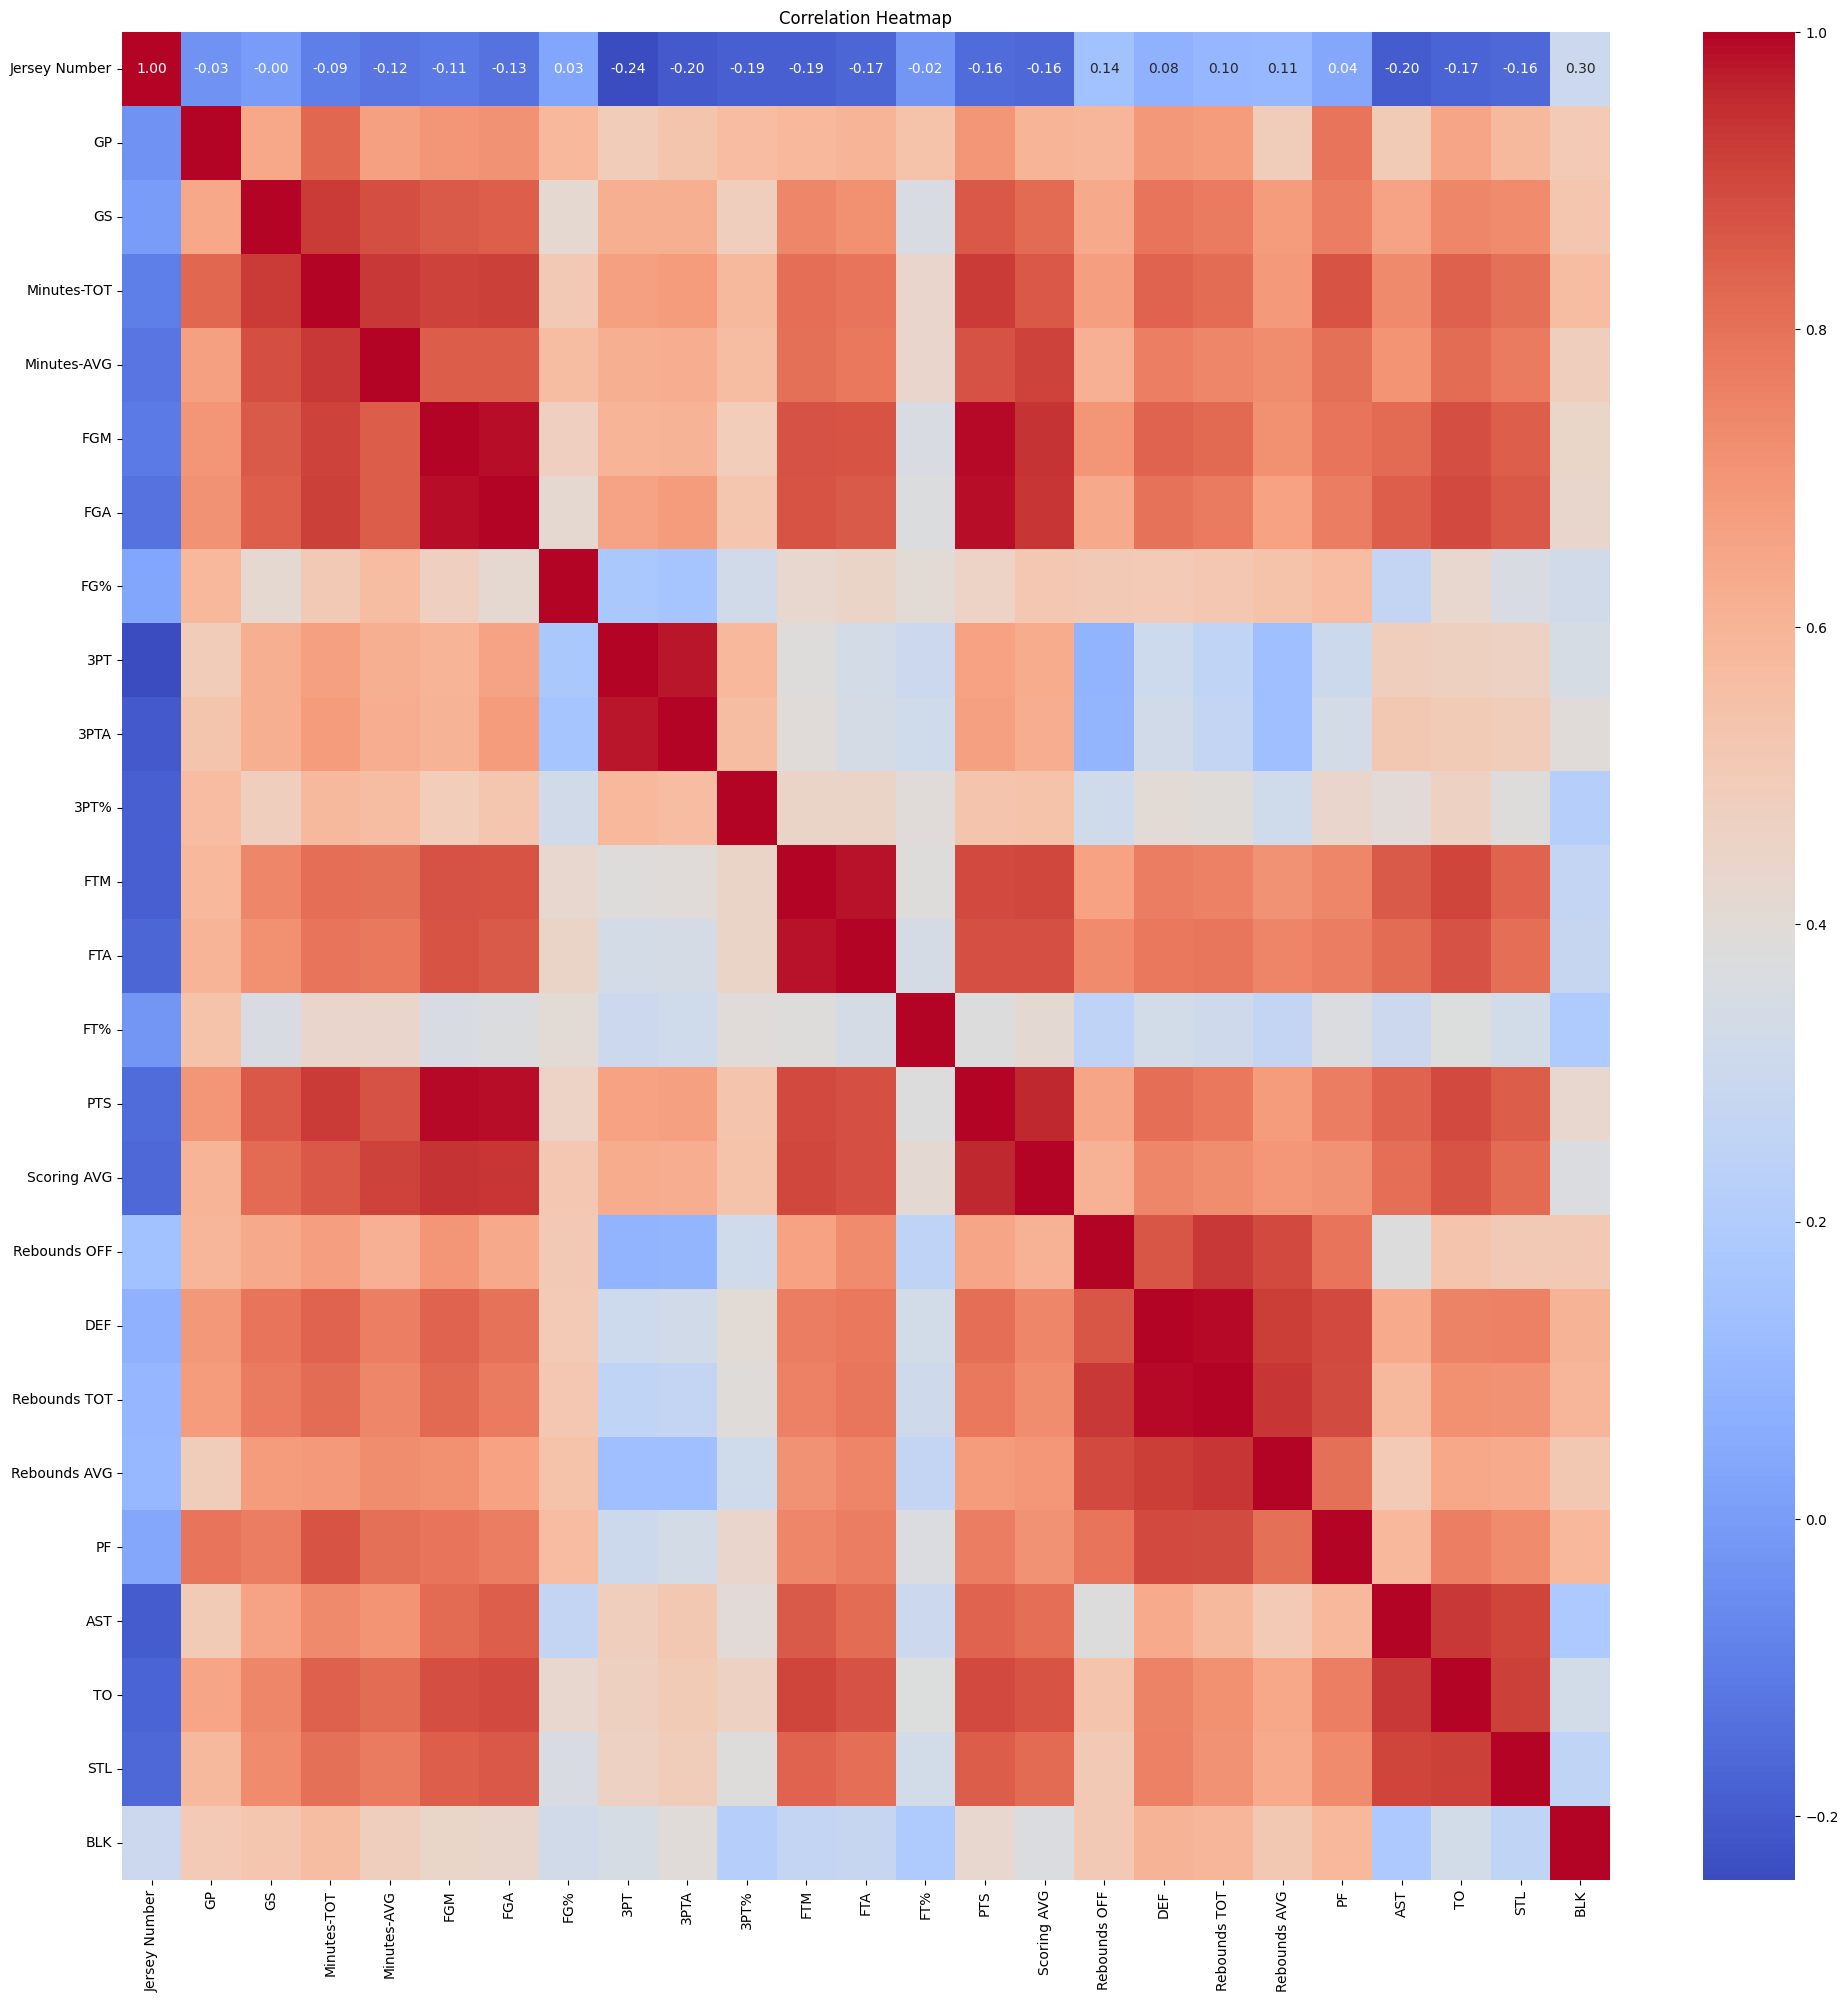

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 24))
sns.heatmap(df_players_5.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [56]:
df_players_5.columns

Index(['Jersey Number', 'Player-', 'GP', 'GS', 'Minutes-TOT', 'Minutes-AVG', 'FGM', 'FGA', 'FG%', '3PT', '3PTA', '3PT%', 'FTM', 'FTA', 'FT%', 'PTS', 'Scoring AVG', 'Rebounds OFF', 'DEF', 'Rebounds TOT', 'Rebounds AVG', 'PF', 'AST', 'TO', 'STL', 'BLK', 'Year'], dtype='object')

In [57]:
# Example for encoding player position if available
df_players_5 = pd.get_dummies(df_players_5, columns=['Year'], drop_first=False)  # Adjust based on actual column name

In [58]:
df_players_5.columns

Index(['Jersey Number', 'Player-', 'GP', 'GS', 'Minutes-TOT', 'Minutes-AVG', 'FGM', 'FGA', 'FG%', '3PT', '3PTA', '3PT%', 'FTM', 'FTA', 'FT%', 'PTS', 'Scoring AVG', 'Rebounds OFF', 'DEF', 'Rebounds TOT', 'Rebounds AVG', 'PF', 'AST', 'TO', 'STL', 'BLK', 'Year_2019-20', 'Year_2020-21', 'Year_2021-22', 'Year_2022-23', 'Year_2023-24'], dtype='object')

In [150]:
#df_players_5

In [60]:
#print(df_players_5.dtypes)

In [61]:
#  feature engineering to add more feature to improve accuracy
df_players_5['PTS_per_Minute'] = df_players_5['PTS'] / df_players_5['Minutes-TOT']
df_players_5['AST_TO'] = df_players_5['AST'] / (df_players_5['TO'] + 1)  # Avoid division by zero
df_players_5['TS%'] = df_players_5['PTS'] / (2 * (df_players_5['FGA'] + 0.44 * df_players_5['FTA']))
df_players_5['Rolling_Avg_PTS'] = df_players_5['PTS'].rolling(window=5).mean()

PTS_per_Minute:

Measures the average points scored per minute on the court.
Formula: 
PTS_per_Minute
=
PTS
Minutes-TOT
PTS_per_Minute= 
Minutes-TOT
PTS
​
 
Higher values indicate greater scoring efficiency.


AST_TO (Assist to Turnover Ratio):

Compares a player’s assists to their turnovers, reflecting playmaking efficiency.
Formula: 
AST_TO
=
AST
TO
AST_TO= 
TO
AST
​
 
A higher ratio signifies better performance in creating scoring opportunities with fewer mistakes.


TS% (True Shooting Percentage):

Evaluates overall shooting efficiency by accounting for field goals, three-pointers, and free throws.
Formula: 
TS%
=
PTS
2
×
(
FGA
+
0.44
×
FTA
)
TS%= 
2×(FGA+0.44×FTA)
PTS
​
 
A higher TS% indicates more effective scoring.



Rolling_Avg_PTS:

Calculates the rolling average of points scored over a specified number of games (e.g., last 5 games).
Helps track performance trends over time, allowing for insight into consistency or improvement.

In [62]:
# Check for missing values
#print(df_players_5.isnull().sum())

In [63]:
df_players_5['TS%'].fillna(df_players_5['TS%'].mean(), inplace=True)
df_players_5['Rolling_Avg_PTS'].fillna(df_players_5['Rolling_Avg_PTS'].mean(), inplace=True)
#df_players_5['PTS_Improvement'].fillna(df_players_5['PTS_Improvement'].mean(), inplace=True)
#df_players_5['PTS_Improvement_Rate'].fillna(df_players_5['PTS_Improvement_Rate'].mean(), inplace=True)

In [64]:
#print(df_players_5.isnull().sum())

In [65]:
# remove multicolliniarity in data
threshold = 0.7

# Find features to drop
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

In [66]:
# Drop the features
df_players_5 = df_players_5.drop(columns=to_drop)

In [67]:
# Features to standardize (after dropping redundant features)
features = ['GP', 'GS', 'Minutes-TOT', 'FGM', 'FG%', '3PT', 'FTM', 'PTS', 
            'Rebounds OFF', 'DEF', 'Rebounds TOT', 'AST', 'TO', 'STL', 'BLK']

# Create and fit the scaler
scaler = StandardScaler()
df_players_5[features] = scaler.fit_transform(data[features])

In [68]:
#df_players_5.head()

In [69]:
# Step 1: Prepare your data
X = df_players_5.drop(columns=['PTS','Player-', 'FGM','Jersey Number'])  # Drop target and non-numeric columns
y = df_players_5['PTS']

In [70]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Step 3: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [72]:
# Step 4: Evaluate model performance on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [73]:
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.03936068770942181
R² Score: 0.9658609706647484


In [74]:
# Implement K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [75]:
# Evaluate model performance using cross-validation
mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

In [76]:
#Print Cross-Validation Results
print(f"Cross-Validated Mean Squared Error for each fold: {mse_scores}")
print(f"Cross-Validated R² Score for each fold: {r2_scores}")

print(f"Mean Cross-Validated Mean Squared Error: {mse_scores.mean()}")
print(f"Mean Cross-Validated R² Score: {r2_scores.mean()}")

Cross-Validated Mean Squared Error for each fold: [0.03936069 0.02719124 0.05853077 0.01973198 0.02912752]
Cross-Validated R² Score for each fold: [0.96586097 0.97377551 0.95005852 0.95387861 0.97239309]
Mean Cross-Validated Mean Squared Error: 0.03478843841778067
Mean Cross-Validated R² Score: 0.9631933406582324


In [77]:
#Get coefficients
coefficients = model.coef_

In [78]:
#Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

In [79]:
#Optionally, take the absolute value for easier comparison
feature_importance_df['Importance'] = np.abs(feature_importance_df['Coefficient'])

In [80]:
#Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [81]:

print(tabulate(feature_importance_df, headers='keys', tablefmt='grid'))


+----+-----------------+---------------+--------------+
|    | Feature         |   Coefficient |   Importance |
+====+=================+===============+==============+
|  2 | Minutes-TOT     |   0.342531    |  0.342531    |
+----+-----------------+---------------+--------------+
| 18 | PTS_per_Minute  |  -0.2673      |  0.2673      |
+----+-----------------+---------------+--------------+
| 11 | Scoring AVG     |   0.154746    |  0.154746    |
+----+-----------------+---------------+--------------+
| 22 | Rebounds OFF    |   0.120543    |  0.120543    |
+----+-----------------+---------------+--------------+
|  1 | GS              |   0.0805736   |  0.0805736   |
+----+-----------------+---------------+--------------+
| 25 | AST             |   0.0765634   |  0.0765634   |
+----+-----------------+---------------+--------------+
| 13 | Year_2019-20    |   0.0756171   |  0.0756171   |
+----+-----------------+---------------+--------------+
|  7 | 3PT%            |  -0.0746638   |  0.0746

Player Strengths 

Minutes-TOT (0.342531):

Strength: Players who can log more minutes are valuable; their endurance and ability to impact the game over time are key assets.

PTS_per_Minute (-0.2673):

Strength: Efficient scoring can indicate a player’s ability to capitalize on opportunities, even if it slightly downplays their overall involvement in other facets.

Scoring AVG (0.154746):

Strength: Consistent scoring ability is crucial for team success. Players with higher averages contribute significantly to the team's offensive output.

Rebounds OFF (0.120543):

Strength: Players who excel in offensive rebounds create second-chance scoring opportunities, which are vital for winning games.

GS (0.0805736):

Strength: Being on the court longer suggests a player’s importance and reliability, contributing positively to team dynamics.

AST (0.0765634):

Strength: High assist numbers reflect a player’s vision and ability to facilitate scoring for teammates, underscoring the importance of playmaking skills.

3PT (0.0425153):

Strength: Players who can successfully shoot from beyond the arc offer spacing and versatility to the offense, making them valuable assets.

TO (0.0444523):

Strength: Fewer turnovers highlight a player’s decision-making and ball-handling skills, which are critical for maintaining offensive flow.


Player Weaknesses


PTS_per_Minute (-0.2673):

Weakness: A heavy focus on scoring can lead to neglecting other critical areas, such as defense or playmaking.

3PT% (-0.0746638):

Weakness: A negative correlation may suggest that while shooting threes is valuable, reliance on it without a balanced attack could hinder overall effectiveness.

FT% (-0.0462125):

Weakness: A lower free throw percentage indicates a potential issue in capitalizing on easy scoring opportunities, which can be detrimental in close games.

Year_2020-21 (-0.0449909) and Year_2021-22 (-0.0199101):

Weakness: Metrics from these seasons reflect challenges or declines in performance, suggesting that players may have struggled during these years.

AST_TO (-0.011995):

Weakness: A low assist-to-turnover ratio can indicate that players may be too aggressive, leading to poor decision-making under pressure.

Rebounds AVG (-0.0117673):

Weakness: Average rebounding stats suggest a lack of dominance on the boards, which can limit a player’s overall impact.

DEF (-0.00669199):

Weakness: Defensive metrics that do not correlate positively indicate that some players may not contribute effectively on the defensive end, which is crucial for team success.

In [82]:
# Overfitting check

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Validate the model
val_predictions = model.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_r2 = r2_score(y_val, val_predictions)

# Test the model
test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print results
print(f"Validation MSE: {val_mse}, Validation R²: {val_r2}")
print(f"Test MSE: {test_mse}, Test R²: {test_r2}")


Validation MSE: 0.0434220666150367, Validation R²: 0.9327660565561259
Test MSE: 0.03057176148363392, Test R²: 0.9848171438089962


In [83]:
#with Noise data
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Validate model performance
validation_mse = mean_squared_error(y_test, y_pred)
validation_r2 = r2_score(y_test, y_pred)

print(f"Validation MSE: {validation_mse}, Validation R²: {validation_r2}")

# Add noise to the target variable
noise_level = 1e-10  # Adjust noise level as needed
y_test_noisy = y_test + np.random.normal(0, noise_level, size=y_test.shape)

# Create a DataFrame for the noisy target variable
features_used = X_train.columns  # Get the feature names used during training
df_noisy = pd.DataFrame(X_test[features_used])  # Use only the valid features
df_noisy['y_noisy'] = y_test_noisy  # Add the noisy target variable

# Fit the model again on the noisy data if needed (optional)
model_noisy = LinearRegression()
model_noisy.fit(df_noisy[features_used], df_noisy['y_noisy'])

# Generate predictions on the noisy test set
y_pred_noisy = model_noisy.predict(df_noisy[features_used])

# Validate performance on the noisy data
test_mse = mean_squared_error(df_noisy['y_noisy'], y_pred_noisy)
test_r2 = r2_score(df_noisy['y_noisy'], y_pred_noisy)

print(f"Test MSE: {test_mse}, Test R²: {test_r2}")

Validation MSE: 0.03936068770942181, Validation R²: 0.9658609706647484
Test MSE: 8.947767805359397e-30, Test R²: 1.0


# Predicting win probability

In [84]:
df_opponent = pd.read_excel("C://Users//Prave//Downloads//basketball_LTuw.xlsx",sheet_name="GamebyGame_Oppents")

In [85]:
#df_opponent.head()

In [86]:
df_opponent.columns

Index(['Opponent', 'Date', 'Score', 'W/L', 'FGM/A', 'PCT', '3FG/A', 'PCT_1', 'FTM/A', 'PCT_2', 'OFF', 'DEF', 'TOT', 'AVG', 'PF', 'AST', 'TO', 'BLK', 'STL', 'PTS', 'AVG_3', 'Year'], dtype='object')

In [87]:
# Split FGM/A into FGM and FGA
df_opponent[['FGM', 'FGA']] = df_opponent['FGM/A'].str.split('-', expand=True).astype(int)

# Split 3FG/A into 3FGM and 3FGA
df_opponent[['3FGM', '3FGA']] = df_opponent['3FG/A'].str.split('-', expand=True).astype(int)

# Split FTM/A into FTM and FTA
df_opponent[['FTM', 'FTA']] = df_opponent['FTM/A'].str.split('-', expand=True).astype(int)

# Drop the original combined columns if needed
df_opponent.drop(columns=['FGM/A', '3FG/A', 'FTM/A'], inplace=True)

In [88]:
#df_opponent

In [89]:
df_opponent.columns

Index(['Opponent', 'Date', 'Score', 'W/L', 'PCT', 'PCT_1', 'PCT_2', 'OFF', 'DEF', 'TOT', 'AVG', 'PF', 'AST', 'TO', 'BLK', 'STL', 'PTS', 'AVG_3', 'Year', 'FGM', 'FGA', '3FGM', '3FGA', 'FTM', 'FTA'], dtype='object')

In [90]:
df_ltu = pd.read_excel("C://Users//Prave//Downloads//basketball_LTuw.xlsx",sheet_name="Overall_GameByGameTeamstats")

In [91]:
#df_ltu.head()

In [92]:
df_ltu.columns

Index(['Opponent', 'Date', 'Score', 'W/L', 'FGM/A', 'PCT', '3FG/A', 'PCT_1', 'FTM/A', 'PCT_2', 'OFF', 'DEF', 'TOT', 'AVG', 'PF', 'AST', 'TO', 'BLK', 'STL', 'PTS', 'AVG_3', 'Year'], dtype='object')

In [93]:
# Split FGM/A into FGM and FGA
df_ltu[['FGM', 'FGA']] = df_ltu['FGM/A'].str.split('-', expand=True).astype(int)

# Split 3FG/A into 3FGM and 3FGA
df_ltu[['3FGM', '3FGA']] = df_ltu['3FG/A'].str.split('-', expand=True).astype(int)

# Split FTM/A into FTM and FTA
df_ltu[['FTM', 'FTA']] = df_ltu['FTM/A'].str.split('-', expand=True).astype(int)

# Drop the original combined columns if needed
df_ltu.drop(columns=['FGM/A', '3FG/A', 'FTM/A'], inplace=True)

In [94]:
#df_ltu

In [95]:
df_ltu.columns

Index(['Opponent', 'Date', 'Score', 'W/L', 'PCT', 'PCT_1', 'PCT_2', 'OFF', 'DEF', 'TOT', 'AVG', 'PF', 'AST', 'TO', 'BLK', 'STL', 'PTS', 'AVG_3', 'Year', 'FGM', 'FGA', '3FGM', '3FGA', 'FTM', 'FTA'], dtype='object')

In [96]:
# Strip leading/trailing whitespaces in 'Opponent' columns
df_ltu['Opponent'] = df_ltu['Opponent'].str.strip()
df_opponent['Opponent'] = df_opponent['Opponent'].str.strip()

In [97]:
# Convert 'Date' columns to datetime format
df_ltu['Date'] = pd.to_datetime(df_ltu['Date'])
df_opponent['Date'] = pd.to_datetime(df_opponent['Date'])

In [98]:
#df_ltu.dtypes

In [99]:
#df_opponent.dtypes

In [100]:
# Now attempt to merge again
df_merged = pd.merge(df_ltu, df_opponent, on=['Opponent', 'Date'], suffixes=('_ltu', '_opponent'))

In [101]:
# If the merged dataframe is still empty, check for rows that are not matching
if df_merged.empty:
    print("Merge resulted in an empty DataFrame.")
    

Merge resulted in an empty DataFrame.


In [102]:
# Find rows in df_ltu that have no match in df_opponent
unmatched_ltu = df_ltu[~df_ltu[['Opponent', 'Date']].apply(tuple, 1).isin(df_opponent[['Opponent', 'Date']].apply(tuple, 1))]
print("Unmatched rows in df_ltu:")
#print(unmatched_ltu)

Unmatched rows in df_ltu:


In [103]:
# Remove 'vs ' from the 'Opponent' column in df_ltu
df_ltu['Opponent'] = df_ltu['Opponent'].str.replace(r'^vs\s+', '', regex=True)

# Check the updated dataframe to ensure the 'vs' prefix is removed
print(df_ltu['Opponent'].head())

0    Mount Vernon Nazarene
1             Indiana East
2            at Rio Grande
3                Ave Maria
4                    Grace
Name: Opponent, dtype: object


In [104]:
# Now attempt to merge again
df_merged = pd.merge(df_ltu, df_opponent, on=['Opponent', 'Date'], suffixes=('_ltu', '_opponent'))

In [105]:
#df_merged

In [106]:
# Convert 'W/L' to binary format: Win = 1, Loss = 0
df_merged['W/L_ltu'] = df_merged['W/L_ltu'].apply(lambda x: 1 if x == 'W' else 0)
df_merged['W/L_opponent'] = df_merged['W/L_opponent'].apply(lambda x: 1 if x == 'W' else 0)


In [107]:
# List of features to compute relative performance
features_to_compare = ['PTS', 'PCT', 'PCT_1', 'PCT_2', 'OFF', 'DEF', 'TOT', 'AVG', 'PF', 
                       'AST', 'TO', 'BLK', 'STL', 'FGM', 'FGA', '3FGM', '3FGA', 'FTM', 'FTA']


In [108]:
# Loop over the features and create relative performance columns
for feature in features_to_compare:
    df_merged[f'{feature}_Diff'] = df_merged[f'{feature}_ltu'] - df_merged[f'{feature}_opponent']


In [109]:
# Select only the relative performance columns along with 'Opponent', 'Date', and 'W/L' (binary)
relative_performance_columns = ['Opponent', 'Date', 'W/L_ltu'] + [f'{feature}_Diff' for feature in features_to_compare]
df_relative_performance = df_merged[relative_performance_columns]


In [110]:
#df_relative_performance

In [111]:
df_relative_performance.columns

Index(['Opponent', 'Date', 'W/L_ltu', 'PTS_Diff', 'PCT_Diff', 'PCT_1_Diff', 'PCT_2_Diff', 'OFF_Diff', 'DEF_Diff', 'TOT_Diff', 'AVG_Diff', 'PF_Diff', 'AST_Diff', 'TO_Diff', 'BLK_Diff', 'STL_Diff', 'FGM_Diff', 'FGA_Diff', '3FGM_Diff', '3FGA_Diff', 'FTM_Diff', 'FTA_Diff'], dtype='object')

In [144]:
df_avg = pd.DataFrame(df_relative_performance)

In [146]:
# Calculate average for each variable
avg_metrics = {
    'Average TO_Diff': df_avg['TO_Diff'].mean(),
    'Average DEF_Diff': df_avg['DEF_Diff'].mean(),
    'Average AST_Diff': df_avg['AST_Diff'].mean(),
    'Average 3FGM_Diff': df_avg['3FGM_Diff'].mean(),
    'Average OFF_Diff': df_avg['OFF_Diff'].mean(),
    'Average 3FGA_Diff': df_avg['3FGA_Diff'].mean(),
    'Average FTM_Diff': df_avg['FTM_Diff'].mean(),
    'Average FTA_Diff': df_avg['FTA_Diff'].mean()
}

In [147]:
# Display the averages
for metric, avg in avg_metrics.items():
    print(f"{metric}: {avg:.2f}")

Average TO_Diff: 0.91
Average DEF_Diff: 1.40
Average AST_Diff: 2.45
Average 3FGM_Diff: 2.18
Average OFF_Diff: -0.79
Average 3FGA_Diff: 3.57
Average FTM_Diff: 0.01
Average FTA_Diff: -0.84


# Logistic Regerssion

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [113]:
# Define features and target variable
# removing PTS, FGM as they hold strong relationship in winning
X = df_relative_performance.drop(columns=['Opponent', 'Date', 'W/L_ltu','PTS_Diff','FGM_Diff'])
y = df_relative_performance['W/L_ltu']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [114]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


LogisticRegression()

In [115]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.93


In [116]:
# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Confusion Matrix:
[[8 0]
 [1 5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.83      0.91         6

    accuracy                           0.93        14
   macro avg       0.94      0.92      0.93        14
weighted avg       0.94      0.93      0.93        14



In [117]:
# Predict probabilities
probabilities = model.predict_proba(X_test)[:, 1]  # Probability of winning
print(probabilities)


[3.18591331e-02 4.22651684e-04 9.99995968e-01 9.99815163e-01
 9.99999902e-01 2.27886076e-03 9.99999993e-01 4.51606352e-01
 1.15637551e-04 5.56970780e-05 9.98562017e-01 1.27501827e-01
 2.22373349e-03 3.39827204e-03]


In [118]:
df_relative_performance.columns

Index(['Opponent', 'Date', 'W/L_ltu', 'PTS_Diff', 'PCT_Diff', 'PCT_1_Diff', 'PCT_2_Diff', 'OFF_Diff', 'DEF_Diff', 'TOT_Diff', 'AVG_Diff', 'PF_Diff', 'AST_Diff', 'TO_Diff', 'BLK_Diff', 'STL_Diff', 'FGM_Diff', 'FGA_Diff', '3FGM_Diff', '3FGA_Diff', 'FTM_Diff', 'FTA_Diff'], dtype='object')

In [119]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np


In [120]:
# Define stratified k-fold cross-validation (to maintain the proportion of wins and losses)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [121]:
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')


In [122]:
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Print the cross-validation scores for each fold and the mean accuracy
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {np.mean(cv_scores):.2f}')


Cross-validation scores: [0.92857143 1.         0.92307692 0.92307692 0.84615385]
Mean accuracy: 0.92


# Hyperparameter Tuning

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [124]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],        # Use L1 or L2 regularization
    'solver': ['liblinear']         # 'liblinear' solver supports L1 and L2 penalties
}


In [125]:
# Create the logistic regression model
model = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')


In [126]:
# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')


Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [127]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the tuned model with cross-validation
tuned_cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f'Tuned cross-validation scores: {tuned_cv_scores}')
print(f'Tuned mean accuracy: {np.mean(tuned_cv_scores):.2f}')


Tuned cross-validation scores: [0.92857143 0.85714286 0.84615385 1.         1.        ]
Tuned mean accuracy: 0.93


In [128]:
# Extract the coefficients from the best logistic regression model
coefficients = best_model.coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort the features by the absolute value of the coefficients to see which are most influential
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

#print(feature_importance[['Feature', 'Coefficient']])
print(tabulate(feature_importance[['Feature', 'Coefficient']], headers='keys', tablefmt='grid'))


+----+------------+---------------+
|    | Feature    |   Coefficient |
+====+============+===============+
|  9 | TO_Diff    |    -0.263489  |
+----+------------+---------------+
|  4 | DEF_Diff   |     0.252855  |
+----+------------+---------------+
| 13 | 3FGM_Diff  |     0.152245  |
+----+------------+---------------+
|  8 | AST_Diff   |     0.13945   |
+----+------------+---------------+
| 16 | FTA_Diff   |     0.0876742 |
+----+------------+---------------+
|  3 | OFF_Diff   |    -0.033529  |
+----+------------+---------------+
|  5 | TOT_Diff   |     0         |
+----+------------+---------------+
|  6 | AVG_Diff   |     0         |
+----+------------+---------------+
|  7 | PF_Diff    |     0         |
+----+------------+---------------+
|  1 | PCT_1_Diff |     0         |
+----+------------+---------------+
| 10 | BLK_Diff   |     0         |
+----+------------+---------------+
| 11 | STL_Diff   |     0         |
+----+------------+---------------+
| 12 | FGA_Diff   |     0   

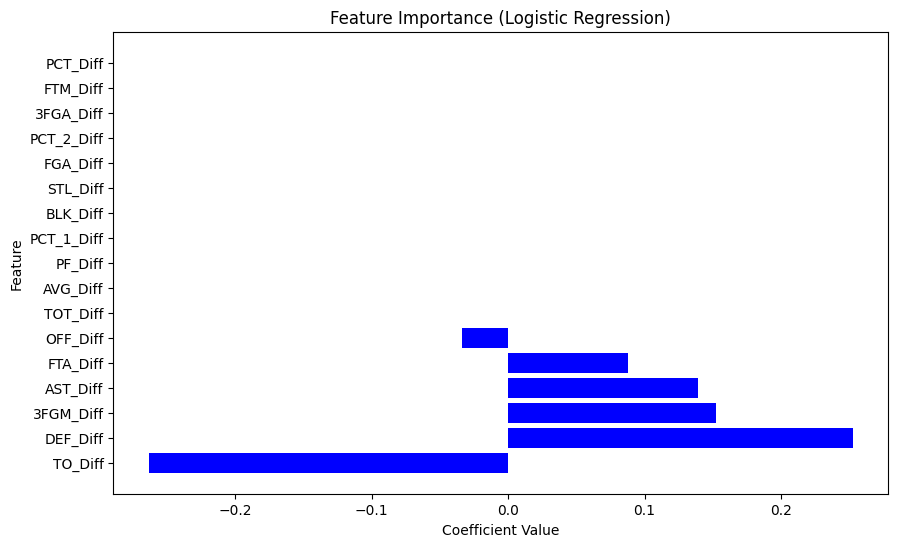

In [129]:
import matplotlib.pyplot as plt

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression)')
plt.show()


I removed the PTS and FGM as they are directly impacting on game winning.

Areas of Deficiency Compared to Opponents
Turnover Difference (TO_Diff: -0.263667):

The team is committing more turnovers than their opponents. This negatively impacts possession and scoring opportunities.

Defensive Metrics (DEF_Diff: 0.253011):

While the coefficient is positive, this suggests that the team is performing better defensively compared to the opponent in certain metrics. However, if the overall performance is lacking, it may indicate inconsistency in defensive execution.

3-Point Field Goals Made Difference (3FGM_Diff: 0.152520):

The team is not capitalizing on 3-point shooting as effectively as their opponents. This could impact overall scoring, especially in close games.

Assists Difference (AST_Diff: 0.139238):

The team is providing fewer assists compared to opponents, which may indicate a lack of teamwork in offensive plays and reduced ball movement.

Free Throws Attempted Difference (FTA_Diff: 0.087618):

The team is not drawing fouls and getting to the free-throw line as often as their opponents, limiting scoring opportunities from free throws.

Offensive Metrics (OFF_Diff: -0.033518):

A slightly negative coefficient suggests that the team may struggle to capitalize on offensive rebounds or second-chance points compared to the opponent.


Other Metrics


TOT_Diff, AVG_Diff, PF_Diff, PCT_1_Diff, BLK_Diff, STL_Diff, FGA_Diff, PCT_2_Diff, 3FGA_Diff, FTM_Diff, PCT_Diff:
These metrics have a coefficient of 0 or close to 0, suggesting that there is no significant difference between the team and their opponents in these areas. This could imply that these aspects are being handled adequately but may need improvement for a competitive edge.

In [130]:
# And you've already fitted the model to the data
best_model = grid_search.best_estimator_

In [131]:
# X_test should be your features for the test set
probabilities = best_model.predict_proba(X_test)

In [132]:
# Display predicted probabilities
# The first column contains the probabilities for class 0 (loss),
# and the second column contains the probabilities for class 1 (win).
print(probabilities)

[[0.55443725 0.44556275]
 [0.86855523 0.13144477]
 [0.03216369 0.96783631]
 [0.08084268 0.91915732]
 [0.00318389 0.99681611]
 [0.91774074 0.08225926]
 [0.00224756 0.99775244]
 [0.25044626 0.74955374]
 [0.97708049 0.02291951]
 [0.97814744 0.02185256]
 [0.16634588 0.83365412]
 [0.77765271 0.22234729]
 [0.94235605 0.05764395]
 [0.77083788 0.22916212]]


In [133]:
win_predictions = (probabilities[:, 1] >= 0.5).astype(int)
print(win_predictions)  # Will print an array of 0s and 1s for losses and wins


[0 0 1 1 1 0 1 1 0 0 1 0 0 0]


In [134]:
df_games = pd.DataFrame(df_relative_performance)

In [135]:
# Check the number of games
num_games = len(probabilities)

In [136]:
# If the number of games is less than the DataFrame rows, adjust accordingly
if num_games < len(df_games):
    df_games = df_games.iloc[:num_games]

In [137]:
# Set threshold
threshold = 0.7

In [138]:
# Analyze probabilities
high_confidence_wins = df_games[probabilities[:, 1] > threshold]
print("Games with high confidence of winning:")
high_confidence_wins

Games with high confidence of winning:


,Opponent,Date,W/L_ltu,PTS_Diff,PCT_Diff,PCT_1_Diff,PCT_2_Diff,OFF_Diff,DEF_Diff,TOT_Diff,AVG_Diff,PF_Diff,AST_Diff,TO_Diff,BLK_Diff,STL_Diff,FGM_Diff,FGA_Diff,3FGM_Diff,3FGA_Diff,FTM_Diff,FTA_Diff
2,Ave Maria,2021-11-06,1,17,0.045,0.224,0.271,-5,13,8,-1.3,-7,11,8,3,-3,-4,-21,6,7,19,18
3,Grace,2021-11-07,0,-15,-0.010,0.103,0.260,-14,-5,-19,-4.8,7,1,7,1,-8,-6,-13,3,4,-6,-16
4,Concordia (MI),2021-11-10,1,14,0.078,0.145,0.404,-7,10,3,-3.5,-7,-5,0,-1,1,-1,-18,-1,-12,17,17
6,Rochester,2021-11-23,0,-20,-0.057,-0.064,-0.167,0,-2,-2,-1.0,1,0,7,-2,-9,-5,-3,-2,-2,-8,-10
7,Lourdes,2021-12-01,1,8,0.079,0.257,0.121,-6,7,1,0.1,3,2,5,4,-4,2,-8,7,7,-3,-8
10,Webber International,2021-12-31,0,-7,0.081,-0.151,0.108,-11,6,-5,-1.4,4,-4,7,1,-7,0,-13,-1,2,-6,-14


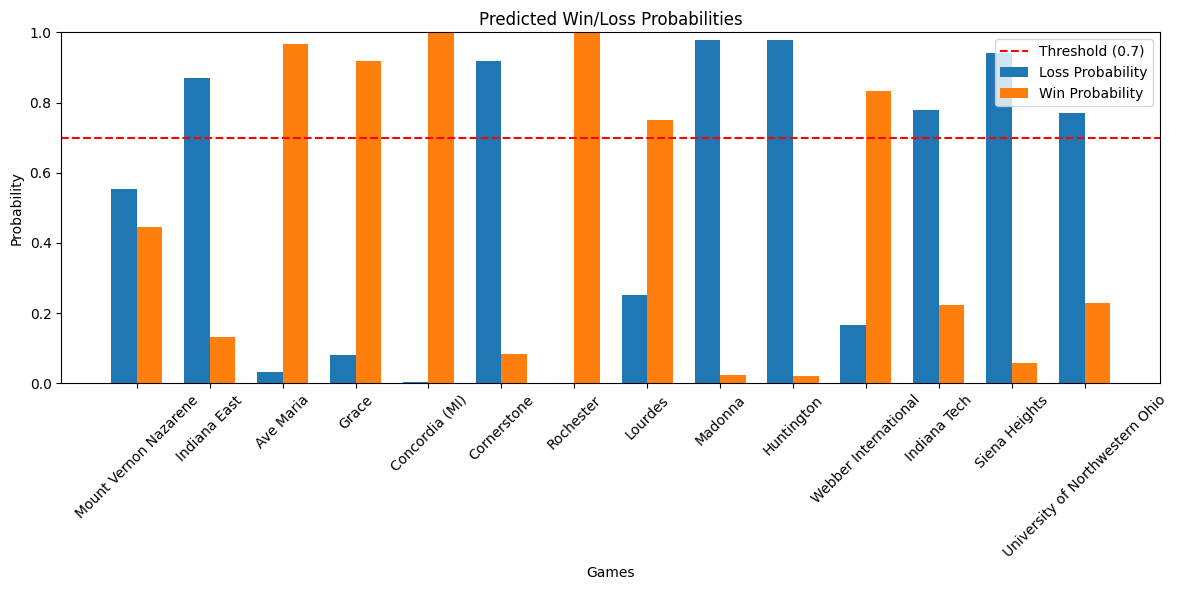

In [139]:
import matplotlib.pyplot as plt

# Create a DataFrame from probabilities for visualization
prob_df = pd.DataFrame(probabilities, columns=['Loss Probability', 'Win Probability'])
prob_df['Game'] = df_games['Opponent']

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(prob_df))

plt.bar(x - bar_width/2, prob_df['Loss Probability'], width=bar_width, label='Loss Probability')
plt.bar(x + bar_width/2, prob_df['Win Probability'], width=bar_width, label='Win Probability')

plt.xlabel('Games')
plt.ylabel('Probability')
plt.title('Predicted Win/Loss Probabilities')
plt.xticks(x, prob_df['Game'], rotation=45)
plt.ylim(0, 1)
plt.axhline(y=0.7, color='r', linestyle='--', label='Threshold (0.7)')
plt.legend()
plt.tight_layout()
plt.show()


In [140]:
#if value is close to 1 high probability of winning and if close to 0 then low probability of winning.
print(tabulate(prob_df, headers='keys', tablefmt='grid'))


+----+--------------------+-------------------+---------------------------------+
|    |   Loss Probability |   Win Probability | Game                            |
+====+====================+===================+=================================+
|  0 |         0.554437   |         0.445563  | Mount Vernon Nazarene           |
+----+--------------------+-------------------+---------------------------------+
|  1 |         0.868555   |         0.131445  | Indiana East                    |
+----+--------------------+-------------------+---------------------------------+
|  2 |         0.0321637  |         0.967836  | Ave Maria                       |
+----+--------------------+-------------------+---------------------------------+
|  3 |         0.0808427  |         0.919157  | Grace                           |
+----+--------------------+-------------------+---------------------------------+
|  4 |         0.00318389 |         0.996816  | Concordia (MI)                  |
+----+----------

# With the fitted logistic regression model, we can calculate the probability of winning for different values of our key features

In [141]:
# Coefficients of the model from feature importance analysis
coefficients = best_model.coef_[0]

# Intercept term (bias)
intercept = best_model.intercept_[0]

# Define the minimum thresholds for all relevant stats
key_stats = {
    'TO_Diff': np.arange(-10, 0, 0.5),      # Reducing turnovers
    'DEF_Diff': np.arange(0, 10, 0.5),      # Improving defense
    'AST_Diff': np.arange(0, 10, 0.5),      # Improving assists
    '3FGM_Diff': np.arange(0, 10, 0.5),     # Improving 3-point field goals made
    'OFF_Diff': np.arange(0, 10, 0.5),      # Improving offensive rebounds
    '3FGA_Diff': np.arange(0, 10, 0.5),     # Improving 3-point attempts
    'FTM_Diff': np.arange(0, 10, 0.5),      # Improving free throws made
    'FTA_Diff': np.arange(0, 10, 0.5),      # Improving free throws attempted
    'FGA_Diff': np.arange(0, 10, 0.5),      # Improving field goals attempted
    'PF_Diff': np.arange(-10, 0, 0.5),      # Reducing personal fouls
    'STL_Diff': np.arange(0, 10, 0.5),      # Improving steals
    'BLK_Diff': np.arange(0, 10, 0.5),      # Improving blocks
    # Add any other key stats if needed
}

In [142]:
# Function to calculate win probability given stats
def calculate_win_probability(stats):
    # Logistic regression formula: p = 1 / (1 + exp(-(b0 + b1*x1 + b2*x2 + ...)))
    z = intercept + sum(coefficients[i] * stats[i] for i in range(len(stats)))
    probability = 1 / (1 + np.exp(-z))
    return probability

In [143]:
# Test for a range of values of all key stats to find the minimum improvement
for stat_name, stat_values in key_stats.items():
    print(f"\nEffect of changing {stat_name}:")
    for value in stat_values:
        # Assuming other stats are constant, vary only one stat at a time
        stats = np.zeros(len(coefficients))  # Placeholder for all features
        stat_index = list(X.columns).index(stat_name)
        stats[stat_index] = value
        
        win_prob = calculate_win_probability(stats)
        print(f"{stat_name} = {value:.2f}, Win Probability = {win_prob:.2f}")


Effect of changing TO_Diff:
TO_Diff = -10.00, Win Probability = 0.93
TO_Diff = -9.50, Win Probability = 0.92
TO_Diff = -9.00, Win Probability = 0.91
TO_Diff = -8.50, Win Probability = 0.90
TO_Diff = -8.00, Win Probability = 0.89
TO_Diff = -7.50, Win Probability = 0.88
TO_Diff = -7.00, Win Probability = 0.86
TO_Diff = -6.50, Win Probability = 0.85
TO_Diff = -6.00, Win Probability = 0.83
TO_Diff = -5.50, Win Probability = 0.81
TO_Diff = -5.00, Win Probability = 0.79
TO_Diff = -4.50, Win Probability = 0.77
TO_Diff = -4.00, Win Probability = 0.74
TO_Diff = -3.50, Win Probability = 0.72
TO_Diff = -3.00, Win Probability = 0.69
TO_Diff = -2.50, Win Probability = 0.66
TO_Diff = -2.00, Win Probability = 0.63
TO_Diff = -1.50, Win Probability = 0.60
TO_Diff = -1.00, Win Probability = 0.57
TO_Diff = -0.50, Win Probability = 0.53

Effect of changing DEF_Diff:
DEF_Diff = 0.00, Win Probability = 0.50
DEF_Diff = 0.50, Win Probability = 0.53
DEF_Diff = 1.00, Win Probability = 0.56
DEF_Diff = 1.50, Win

1. Turnovers Difference (TO_Diff)

Average TO_Diff: 0.91
Improvement target: Reducing turnovers to a -10 TO_Diff is ideal, leading to a win probability of 0.93. If the current turnover difference is near zero, work to reduce turnovers by at least 5-10 per game.
Actionable Strategy: Focus on ball handling and decision-making drills to reduce turnovers.

2. Defensive Rebounds Difference (DEF_Diff)

Average DEF_Diff: 1.40
Improvement target: Increasing the defensive rebound difference to 9.5 DEF_Diff correlates with a win probability of 0.92. If the current difference is near zero, the team needs to improve by at least 5-10 defensive rebounds.
Actionable Strategy: Emphasize boxing out and positioning for defensive rebounds to control possessions.

3. Assists Difference (AST_Diff)

Average AST_Diff: 2.45
Improvement target: A 9.5 assist difference boosts the win probability to 0.79. If the current assist difference is near zero, aim to increase assists by 5-10 per game.
Actionable Strategy: Enhance ball movement, encourage more passing, and create plays that lead to easy assists.

4. 3-Point Field Goals Made Difference (3FGM_Diff)

Average 3FGM_Diff: 2.18
Improvement target: A 9.5 difference in made 3-pointers leads to a win probability of 0.81. If your team is making fewer 3-pointers than opponents, aim to increase the difference by around 5-10 made 3-pointers per game.
Actionable Strategy: Focus on 3-point shooting drills, especially under pressure situations, and identify players who can consistently make 3-pointers.

5. Offensive Rebounds Difference (OFF_Diff)

Average OFF_Diff: -0.79
Improvement target: Surprisingly, increasing offensive rebounds leads to a decrease in win probability. Aim to not focus on offensive rebounds as a key metric, as the win probability drops from 50% to 42% as the difference increases.
Actionable Strategy: Focus more on getting back on defense rather than overly pursuing offensive rebounds, to prevent fast breaks by the opponent.

6. 3-Point Field Goal Attempts Difference (3FGA_Diff)

Average 3FGA_Diff: 3.57
Improvement target: There is no significant impact on win probability with 3-point attempts. This suggests that simply increasing 3-point attempts won’t improve win chances. Instead, focus on shot selection and efficiency.
Actionable Strategy: Encourage players to take quality 3-point shots rather than just increasing the number of attempts.

7. Free Throws Made Difference (FTM_Diff)

Average FTM_Diff: 0.01
Improvement target: Similar to 3-point attempts, free throws made have no major impact on win probability.
Actionable Strategy: Continue emphasizing free throw accuracy but don’t prioritize increasing free throw attempts as a key strategy.

8. Free Throw Attempts Difference (FTA_Diff)

Average FTA_Diff: -0.84
Improvement target: A 9.5 difference in free throw attempts raises win probability to 0.66. If your team is near zero in free throw attempts compared to opponents, aim to increase attempts by around 5-10 per game.
Actionable Strategy: Drive to the basket more often to draw fouls and increase free throw attempts.

Summary of Key Improvement Targets:
Turnovers: Aim for 5-10 fewer turnovers per game compared to opponents.
Defensive Rebounds: Increase defensive rebounds by at least 5-10 more rebounds per game.
Assists: Increase assists by 5-10 more per game.
3-Point Shooting: Improve the 3-point field goals made by 5-10 more 3-pointers.
Offensive Rebounds: Focus less on offensive rebounds, as it doesn’t correlate with wins.
Free Throw Attempts: Increase free throw attempts by around 5-10 more per game.